In [8]:
import numpy as np
import torch
from gpsr.datasets import split_dataset, QuadScanDataset

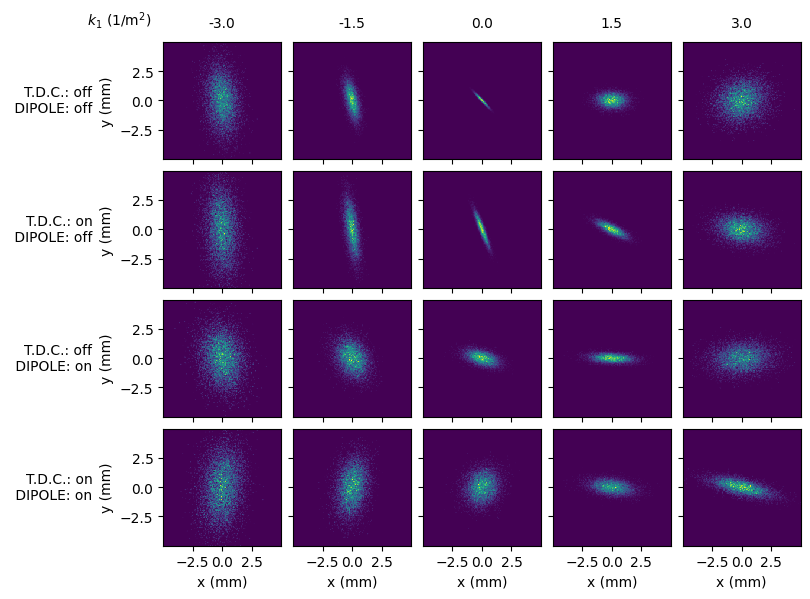

In [2]:
obs_dataset = torch.load(
    "example_data/example_datasets/reconstruction_6D.dset", weights_only=False
)

obs_dataset.plot_data(publication_size=True);

In [3]:
train_k_ids = np.array([0, 2, 4])
train_dset, test_dset = split_dataset(obs_dataset, train_k_ids)

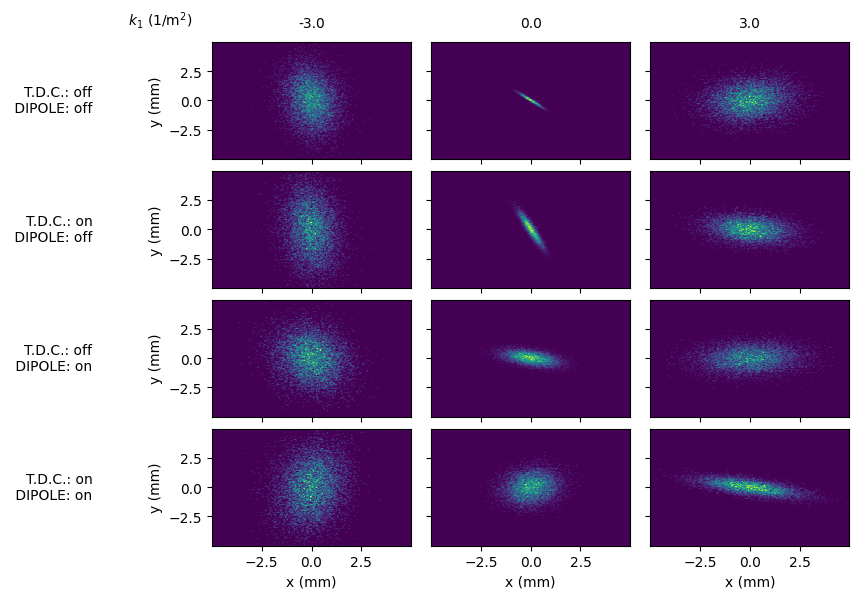

In [4]:
train_dset.plot_data(publication_size=True);

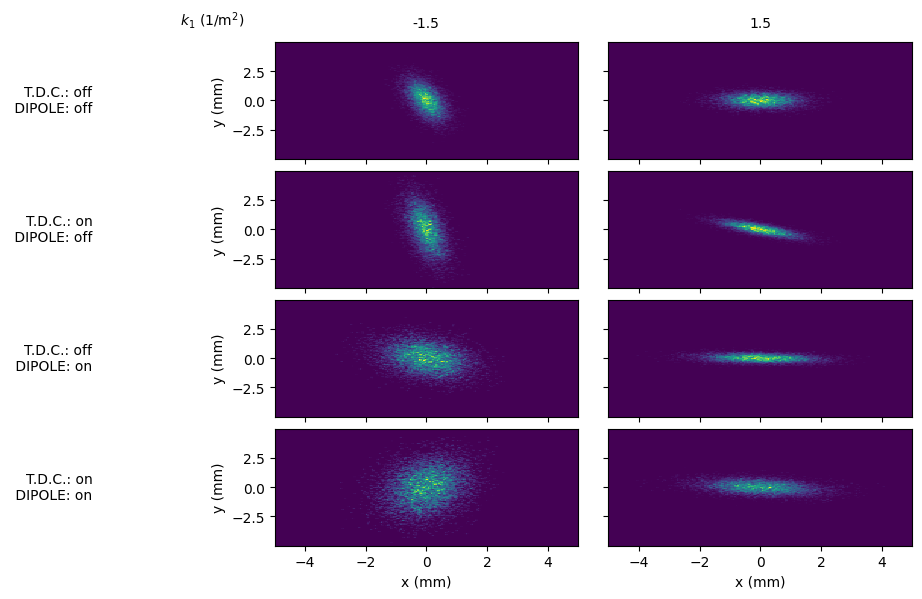

In [5]:
test_dset.plot_data(publication_size=True);

torch.Size([10, 1])
torch.Size([10, 100, 100])


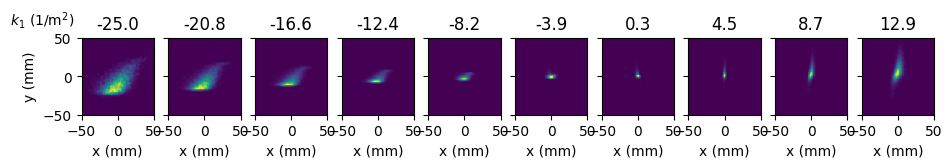

In [9]:
train_dset = torch.load(
    "example_data/example_datasets/reconstruction_4D_train.dset", weights_only=False
)
print(train_dset.parameters.shape)
print(train_dset.observations[0].shape)
train_dset.plot_data();

torch.Size([10, 1])
torch.Size([10, 100, 100])


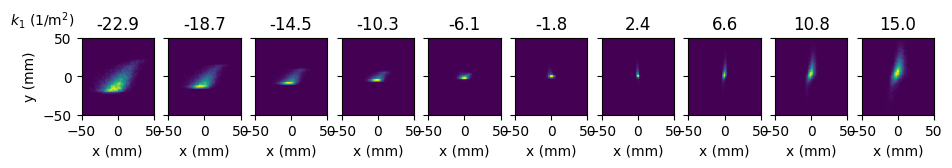

In [10]:
test_dset = torch.load(
    "example_data/example_datasets/reconstruction_4D_test.dset", weights_only=False
)
print(test_dset.parameters.shape)
print(test_dset.observations[0].shape)
test_dset.plot_data();

In [26]:
complete_parameters = torch.cat((train_dset.parameters, test_dset.parameters), dim=0)
sort_ids = complete_parameters[:, 0].argsort()
complete_parameters = complete_parameters[sort_ids]
complete_observations = torch.cat(
    (train_dset.observations[0], test_dset.observations[0]), dim=0
)
complete_observations = complete_observations[sort_ids]
print(complete_parameters.shape)
print(complete_observations.shape)

torch.Size([20, 1])
torch.Size([20, 100, 100])


In [27]:
complete_dataset = QuadScanDataset(
    parameters=complete_parameters,
    observations=complete_observations,
    screen=train_dset.screen,
)

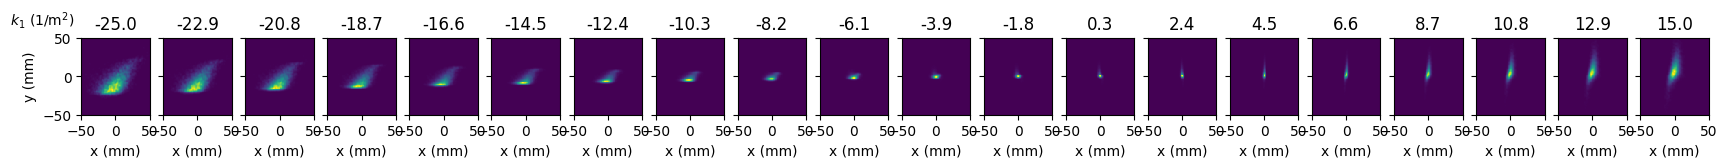

In [29]:
complete_dataset.plot_data();

In [30]:
torch.save(complete_dataset, "example_data/example_datasets/reconstruction_4D.dset")

In [ ]:
train_dset.plot_data();

In [ ]:
test_dset.plot_data();